In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.09786438 0.15262349 0.18156578 ... 0.0785362  0.17674563 0.21010888]
 [0.10902743 0.17003273 0.20227636 ... 0.08749455 0.1969064  0.23407528]
 [0.34992469 0.54572184 0.64920811 ... 0.28081469 0.63197317 0.75126708]
 ...
 [0.19756848 0.30811612 0.36654477 ... 0.15854878 0.35681387 0.42416755]
 [0.28707289 0.4477019  0.53260046 ... 0.2303761  0.51846118 0.61632809]
 [0.25945448 0.40462986 0.48136059 ... 0.20821232 0.4685816  0.55703303]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.02213779  0.25880815  0.20525794 ...  0.2208719   0.25769498
   0.26327728]
 [ 0.19030658  0.10106256  0.17638351 ...  0.10843942  0.09003718
   0.26645186]
 [ 0.21602507  0.56557897  0.63042781 ...  0.29476672  0.58486314
   0.6664524 ]
 ...
 [ 0.10506307  0.00266323  0.36333684 ...  0.19347147  0.38636912
   0.28257388]
 [ 0.27996929  0.43272487  0.51675647 ...  0.23678768  0.41885496
   0.64718766]
 [ 0.10033228  0.41901561  0.4785437  ...  0.34519408  0.49911861
   0.63

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[ 0.08397782  0.10718333 -0.14578768  0.07822209  0.06319666  0.21635625
 -0.1183473  -0.06568423  0.23259949  0.30004209 -0.45137946 -0.19196126
 -0.3003252  -0.36419677  0.1085082   0.00776755 -0.01832963  0.04890059
  0.16214294  0.18782284 -0.18193915  0.18679923  0.14986404  0.1238629
 -0.11227704 -0.24173209  0.20141308 -0.00055479 -0.00719705  0.02388347
  0.18303939  0.02036666 -0.16017362 -0.17721348 -0.05359026  0.03765509
 -0.03218849  0.33168491 -0.17593664  0.2116521  -0.03155904 -0.23577954
  0.17767465  0.17966576  0.02757142  0.14653671 -0.13387967 -0.21765854
  0.36363874 -0.06046345]
[-0.00593676  0.07949611 -0.02808902  0.23789038 -0.09155405  0.04608389
 -0.04087888 -0.02014834 -0.11266942 -0.1020726  -0.14671574 -0.13650728
  0.07159428 -0.03497065  0.03697357 -0.2216387   0.12256611 -0.07909898
  0.12799322 -0.08221526 -0.05442992  0.01474225  0.39623166 -0.38969067
 -0.27001062 -0.01102    -0.24015306 -0.26749121 -0.

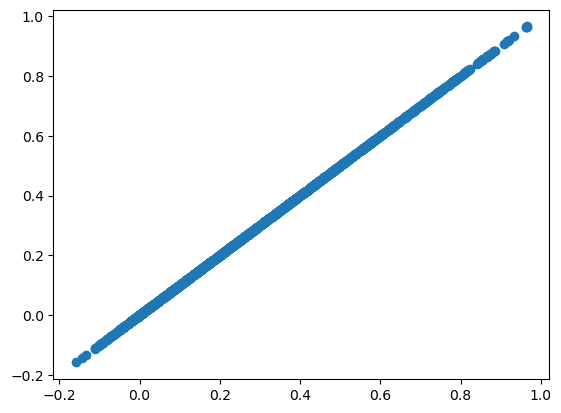

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

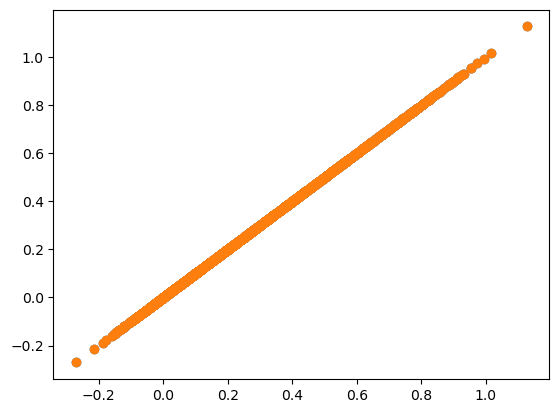

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539],
       [150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539],
       [150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539],
       ...,
       [150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539],
       [150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539],
       [150.43454539, 150.43454539, 150.43454539, ..., 150.43454539,
        150.43454539, 150.43454539]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([0.10142217, 0.17168299, 0.21423495, 0.19462634, 0.19806399,
        0.16718395, 0.25404804, 0.03534932, 0.1103971 , 0.06588998,
        0.01838932, 0.16361868, 0.12079584, 0.16594369, 0.03096951,
        0.04985631, 0.17696977, 0.2614007 , 0.20771509, 0.11611679,
        0.22787069, 0.22968317, 0.02200501, 0.03240415, 0.1109081 ,
        0.06000675, 0.09961933, 0.06899989, 0.0381203 , 0.24239247,
        0.13997668, 0.16965296, 0.01281989, 0.11284173, 0.07566835,
        0.23079041, 0.25964708, 0.09534143, 0.21534226, 0.23973805]),
 array([0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.00520562, 0.00520562,
        0.00520562, 0.00520562, 0.00520562, 0.

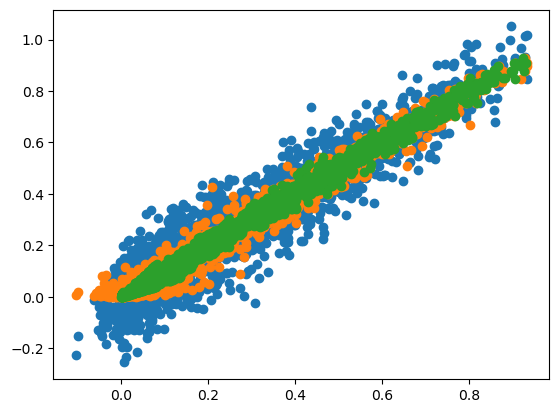

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


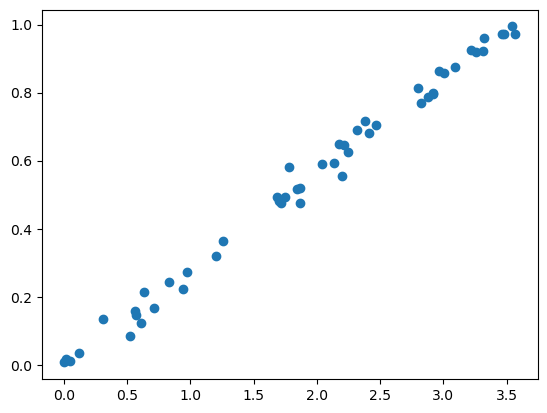

In [12]:
plt.scatter(mycebmf.L[:,0], u)

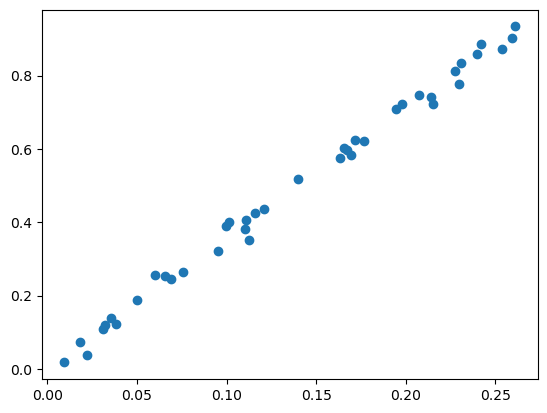

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([ 0.02834842,  0.04276024, -0.07501526,  0.02518921,  0.01861766,
        0.16964606, -0.04954168, -0.01911917,  0.19001025,  0.2589459 ,
       -0.39385169, -0.13291734, -0.2567815 , -0.31687574,  0.04424136,
        0.0024509 , -0.00421561,  0.0134355 ,  0.09733085,  0.13109146,
       -0.11926691,  0.12898692,  0.08401412,  0.0572707 , -0.04599699,
       -0.19556585,  0.1507411 ,  0.00040389, -0.00149264,  0.00642336,
        0.12513686,  0.00563969, -0.09240026, -0.11357749, -0.01427902,
        0.01004552, -0.00809825,  0.29007499, -0.11329497,  0.16159601,
       -0.00762333, -0.18896025,  0.11664524,  0.12019046,  0.00737825,
        0.07843548, -0.0633758 , -0.16742327,  0.31811493, -0.01700945])

In [15]:
for i in range(40):
    mycebmf.iter()

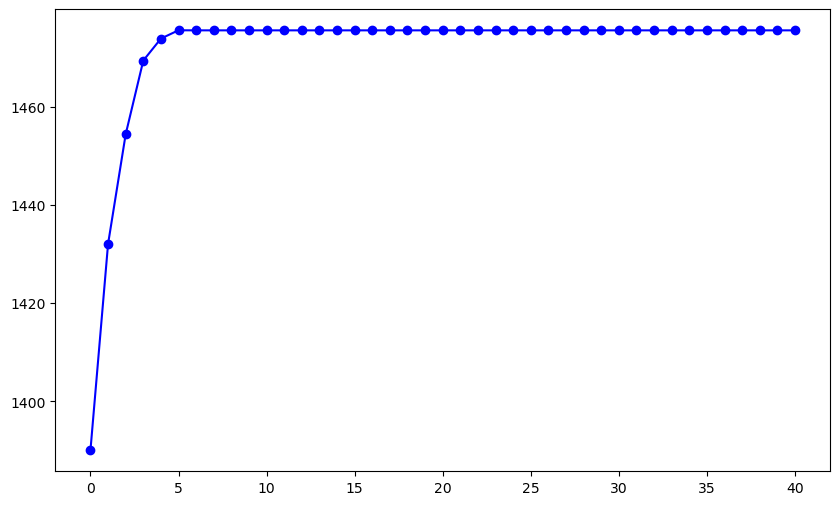

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

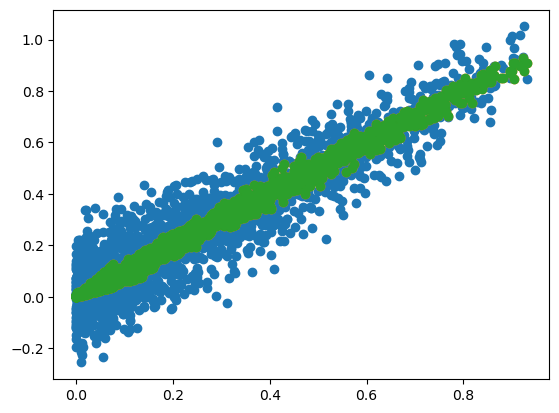

In [17]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [18]:
mycebmf.L
 

array([[ 8.37765203e-001,  2.79687828e-289, -7.67128719e-307,
         2.24823006e-298, -1.77631550e-312],
       [ 9.80142007e-001,  3.58250444e-289, -1.03486561e-306,
         2.87497743e-298, -2.12619876e-312],
       [ 3.10664145e+000, -4.70730975e-289,  1.22041105e-306,
        -3.73492230e-298,  3.14649039e-312],
       [ 3.90423856e-002,  2.60736891e-289, -7.33243160e-307,
         2.12264901e-298, -1.62705181e-312],
       [ 1.35644713e-002,  2.10107405e-289, -5.62459057e-307,
         1.69850036e-298, -1.37747247e-312],
       [ 2.93653761e+000,  7.27386682e-289, -1.92021353e-306,
         5.88037095e-298, -4.84180321e-312],
       [ 2.47911180e+000, -3.84675870e-289,  9.79799945e-307,
        -3.29044106e-298,  2.77624268e-312],
       [ 1.85653174e+000, -2.08861475e-289,  6.58489194e-307,
        -1.58002187e-298,  1.03404947e-312],
       [ 3.27939221e+000,  7.82632517e-289, -2.05648021e-306,
         6.34875317e-298, -5.24593765e-312],
       [ 2.97909176e-001,  9.91057189